In [1]:
import re
import string
import numpy as np
import pandas as pd

# importing data set into dataframes with two columns: Text and Class
testData = pd.read_csv("/home/jovyan/binder/test.csv", names=["Review", "Class"], delimiter=",", header=None)
trainData = pd.read_csv("/home/jovyan/binder/train.csv", names=["Review", "Class"], delimiter=",", header=None)
valData = pd.read_csv("/home/jovyan/binder/val.csv", names=["Review", "Class"], delimiter=",", header=None)

In [2]:
print(testData.head())
print("")
print(trainData.head())
print("")
print(valData.head())
print("")
print("Test Samples per class: {}".format(np.bincount(testData.Class)))
print("Train Samples per class: {}".format(np.bincount(trainData.Class)))
print("Val Samples per class: {}".format(np.bincount(valData.Class)))
# Count of samples in each data set

                                              Review  Class
0  wild things is a suspenseful thriller starring...      1
1  i know it already opened in december , but i f...      1
2  what's shocking about " carlito's way " is how...      1
3  uncompromising french director robert bresson'...      1
4  aggressive , bleak , and unrelenting film abou...      1

                                              Review  Class
0  note : some may consider portions of the follo...      1
1  note : some may consider portions of the follo...      1
2  every once in a while you see a film that is s...      1
3  when i was growing up in 1970s , boys in my sc...      1
4  the muppet movie is the first , and the best m...      1

                                              Review  Class
0  if he doesn=92t watch out , mel gibson is in d...      1
1  wong kar-wei's " fallen angels " is , on a pur...      1
2  there is nothing like american history x in th...      1
3  an unhappy italian housewife , a lo

In [3]:
conda install -c anaconda nltk

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         128 KB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    click-7.1.2                |             py_0          67 KB  anaconda
    nltk-3.5                   |             py_0         1.1 MB  anaconda
    regex-2020.10.15           |   py36h7b6447c_0         361 KB  anaconda
    ------------------------------------------------------------
                                           Total:         1.8 MB

The following NEW packages will be INSTALLED:

In [4]:
!conda install -c anaconda seaborn -y


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.11.0             |             py_0         216 KB  anaconda
    ------------------------------------------------------------
                                           Total:         216 KB

The following NEW packages will be INSTALLED:

  seaborn            anaconda/noarch::seaborn-0.11.0-py_0



seaborn-0.11.0       | 216 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [5]:
import nltk
from matplotlib import pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
# function used for text cleaning of input data
def clean(df):
    corpus = list()  # define empty list for corpus
    lines = df["Review"].values.tolist()  # apply text values from "Review" column to the data frame
    for text in lines: 
        text = text.lower() 
        text = re.sub(r"[,.\"!$%^&*(){}?/;`~:<>+=-]", "", text)  # regexp used to remove all special characters
        tokens = word_tokenize(text)  # splitting text
        table = str.maketrans('', '', string.punctuation) 
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        stop_words.discard("not")
        words = ' '.join(words)  # joining tokenize words together
        corpus.append(words)  # amends cleaned text to corpus
    return corpus

In [7]:
# applying clean function to data sets
clTest = clean(testData)
clTrain = clean(trainData)
clVal = clean(valData)

In [8]:
# loading TF-IDF class for feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
TF = TfidfVectorizer(min_df=15, ngram_range=(1,2)) 
xTrain = TF.fit_transform(clTrain).toarray() 
yTrain = trainData[['Class']].values
xTest = TF.transform(clTest).toarray()
yTest = testData[['Class']].values
xVal = TF.transform(clVal).toarray()
yVal = valData[['Class']].values

In [9]:
# loading Multinomial Naive Bayes model for text classification
from sklearn.naive_bayes import MultinomialNB
mNB = MultinomialNB()
mNB.fit(xTrain, np.ravel(yTrain)) 
y_pred_ts = mNB.predict(xTest)
y_pred_tr = mNB.predict(xTrain)
y_pred_va = mNB.predict(xVal)

Test Set Accuracy: 0.86

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       200
           1       0.86      0.84      0.85       200

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400




(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

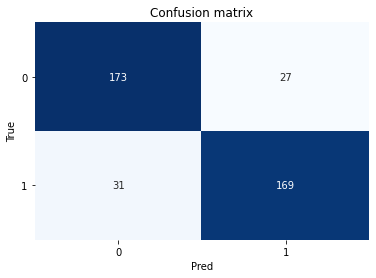

In [10]:
# sklearn metrics used to evaluate perfomance (Accuracy) of ML model on test and val datasets and plot confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
tsaccuracy = accuracy_score(yTest, y_pred_ts)
tCM = confusion_matrix(yTest, y_pred_ts)
tClasses = np.unique(yTest)

print("Test Set Accuracy:",  round(tsaccuracy,2))
print("")
print("Test Set Metrics:\n{}".format(classification_report(yTest, y_pred_ts)))
print("")

# Plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(tCM, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=tClasses,
       yticklabels=tClasses, title="Confusion matrix")
plt.yticks(rotation=0)


Val Set Accuracy: 0.82

Val Set Metrics:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       100
           1       0.82      0.83      0.83       100

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200




(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

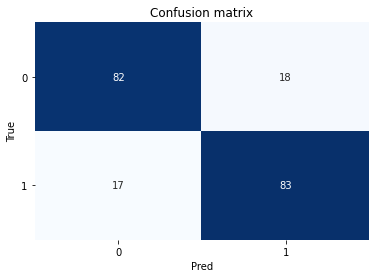

In [11]:
vlaccuracy = accuracy_score(yVal, y_pred_va)
vCM = confusion_matrix(yVal, y_pred_va)
vClasses = np.unique(yVal)

print("Val Set Accuracy:",  round(vlaccuracy,2))
print("")
print("Val Set Metrics:\n{}".format(classification_report(yVal, y_pred_va)))
print("")

# Plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(vCM, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=vClasses,
       yticklabels=vClasses, title="Confusion matrix")
plt.yticks(rotation=0)